# Social Network Analysis @ UNIPI
## Solution of the Second Midterm  
### 16/5/2022

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Ex. 1: Community Evaluation [6 points]

Given the Golomb graph $\mathcal{G}$, compare the following partitions.

- $[(1,2,3,6,8), (0,4,5,7,9)]$
- $[(0,1,3,4,5,8), (2,6,7,9)]$

Which partition is best with respect to the modularity score? which for conductance?

In [4]:
g = nx.petersen_graph()

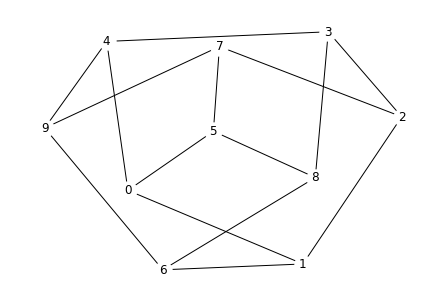

In [5]:
nx.draw_spring(g, with_labels=True, node_color="w")
plt.savefig("net.png")

In [6]:
p1 = [[1,2,3,6,8], [0,4,5,7,9]]
p2 = [[0,1,3,4,5,8], [2,6,7,9]]

### Modularity

In [7]:
def modularity(graph, community):
    vc = len(community)
    e = graph.number_of_edges()
    degC = sum([i[1] for i in graph.degree(community)])
    return ((vc/e) - (degC/(2*e)))**2

In [8]:
f"P1 - C1: {modularity(g, p1[0])} C2: {modularity(g, p1[1])}"

'P1 - C1: 0.027777777777777783 C2: 0.027777777777777783'

In [9]:
min(modularity(g, p1[0]), modularity(g, p1[1]))

0.027777777777777783

In [10]:
f"P2 - C1: {modularity(g, p2[0])} C2: {modularity(g, p2[1])}"

'P2 - C1: 0.03999999999999998 C2: 0.017777777777777785'

In [11]:
min(modularity(g, p2[0]), modularity(g, p2[1]))

0.017777777777777785

#### Best Partition (Modularity): P3

In [12]:
max(0.027777777777777783, 0.017777777777777785)

0.027777777777777783

### Conductance

In [13]:
def conductance(graph, community):
    gs = nx.subgraph(graph, community)
    ec = gs.number_of_edges()
    eoc = sum([len(list(graph.neighbors(u)))-len(list(gs.neighbors(u))) for u in community])
    return (2*eoc)/((2*ec)+eoc)

In [14]:
f"P1 - C1: {conductance(g, p1[0])} C2: {conductance(g, p1[1])}"

'P1 - C1: 0.6666666666666666 C2: 0.6666666666666666'

••••••••••••max(conductance(g, p1[0]), conductance(g, p1[1]))

In [16]:
f"P2 - C1: {conductance(g, p2[0])} C2: {conductance(g, p2[1])}"

'P2 - C1: 0.6666666666666666 C2: 1.0'

In [17]:
max(conductance(g, p2[0]), conductance(g, p2[1]))

1.0

#### Best partition (conductance): P1

In [18]:
min(0.6666666666666666, 1)

0.6666666666666666

## Ex 2: Hypergraph [6 points]

Given the following incidence matrix I:

- Draw the bipartite graph;
- Draw the left and right projections of the bipartite graph;
- Draw the Hypergraph (nodes on the rows);
- Draw the s-line graph with s = 3.

| |A|B|C|D|E|F|G|H|
|---|---|---|---|---|---|---|---|---|
|**1**| 1 | 0 | 0 | 1 | 0 | 1 | 1 | 0 |
|**2**| 0 | 1 | 0 | 1 | 0 | 0 | 0 | 1 |
|**3**| 1 | 1 | 0 | 0 | 1 | 0 | 1 | 1 |
|**4**| 1 | 0 | 0 | 1 | 0 | 0 | 1 | 1 |
|**5**| 0 | 0 | 1 | 0 | 1 | 0 | 0 | 0 |
|**6**| 1 | 0 | 1 | 0 | 0 | 1 | 1 | 1 |

**Solution**

In the evaluation (due to the considerable size of the incidence matrix) we considered acceptable all the proposed solutions that correctly identified the required transformation.

## Es 3: Threshold Model [8 points]

Given the Golomb graph $\mathcal{G}$, applying the threshold model considering the following scenarios:

- S1
    - Set of initial infected nodes: I = {10}
    - Node threshold $\tau = \frac{1}{3}$
- S2
    - Set of initial infected nodes: I = {1}
    - Node threshold $\tau_t = \frac{1}{3}$ if $t$ module $2 =0$, otherwise $\tau_t = \frac{1}{2}$
  
Consider a node infected at time $t$ iff at least $\tau\%$ of its neighbors were already infected at $t-1$.

### S1

In [19]:
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as epd

# Model selection
model = epd.ThresholdModel(g)

# Model Configuration
config = mc.Configuration()
config.add_model_initial_configuration("Infected", [1])

# Setting node parameters
threshold = 1/3
for i in g.nodes():
    config.add_node_configuration("threshold", i, threshold)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(5)
for it in iterations:
    infected = [i for i, v in it['status'].items() if v == 1]
    print(f"Iteration: {it['iteration']} Infected: {infected}")

Iteration: 0 Infected: [1]
Iteration: 1 Infected: [0, 2, 6]
Iteration: 2 Infected: [3, 4, 5, 7, 8, 9]
Iteration: 3 Infected: []
Iteration: 4 Infected: []


In [20]:
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as epd

# Model selection
model = epd.ThresholdModel(g)

# Model Configuration
config = mc.Configuration()
config.add_model_initial_configuration("Infected", [9])

model.set_initial_status(config)

for t in range(6):
    # threshold update
    if t%2 == 0:
        threshold = 1/3
    else:
        threshold = 1/2
    
    for i in g.nodes():
        config.add_node_configuration("threshold", i, threshold)

    it = model.iteration()
    infected = [i for i, v in it['status'].items() if v == 1]
    print(f"Iteration: {it['iteration']} Threshold: {threshold} Infected: {infected}")

Iteration: 0 Threshold: 0.3333333333333333 Infected: [9]
Iteration: 1 Threshold: 0.5 Infected: []
Iteration: 2 Threshold: 0.3333333333333333 Infected: [4, 6, 7]
Iteration: 3 Threshold: 0.5 Infected: []
Iteration: 4 Threshold: 0.3333333333333333 Infected: [0, 1, 2, 3, 5, 8]
Iteration: 5 Threshold: 0.5 Infected: []


## Ex. 4: Stream Graph [6 points]


Given the stream graph in Figure:

<img src='img/stream_graph.png'/>

- describe the stream graph components $S=(T, V, W, E)$; 
- how many nodes and edges does the Stream Graph have?
- what's the neighbors set of d? and of a?
- identify the shortest, the fastest and the foremost paths among [a, e];
- identify the shortest paths among the pairs [a, f] and [b, f];

**First question:** Either an enumeration of the elements in the T,V,W,E sets or their formal definition were accepted.

**Second question:**

|V| = 6
|T| = 10
|E| = 21
|W| = 60

n = 60/10 
m = 21/10

**Third quetion:**

N(a) = [1,10]x{e}, [2,4]x{f}, [10,11]x{e} 

N(d) = [3,5]x{b}, [5,7]x{c}, [7,9]x{e} 

**Fourth question:**

shortest e fastest [a,e] = (a,e,10)  

foremost [a,e] = (a,b,1);(b,d,3);(d,e,4)

**Fifth question:**

shortest [a,f] = (a,f,2)

shortest [b,f] = (b,a,1);(a,f,2)

## Ex. 5: Multiple Choice Questions [4 points]

Identify the correct answer(s), among the ones proposed, to the following questions:
- In unsupervised link prediction, the Katz measure is:
    - **(A)** Path-based 
    - (B) Neighborhood-based
    - (C) Ranking-based
    - (D) Other - specify
- Q2: What are the main limitations of Opinion Dynamics modeling?
    - (A) The lack of causal interpretation
    - **(B)** The lack of empirical data
    - (C) The lack of transparency
    - **(D)** Models are too simple
- Q3: Which one(s) of the following attacks target nodes?
    - **(A)** Community-based
    - (B) Neighborhood overlap removal
    - **(C)** Centrality-based
    - (D) Edge Betweness Centrality removal
- Q4: Which one(s) of the following transformations allow to convert an interval graph to a graph series?
    - (A) Persistence
    - **(B)** Discretization
    - (C) Aggregation 
    - (D) Reformulation

## Ex. 6: Open Question [2 points]

Suppose you have to model the spreading of Covid-19. Which model(s) among the ones introduced in class is (are) best suitable for this task? Discuss your answer.

**Answer**: SIS since even vaccination does not completely assure a total and persistent immunity - thus SIR is an overoptimistic modeling choice.